<a href="https://colab.research.google.com/github/YangJeongA/class2022Spring/blob/main/220518%2C_0523_huggingface_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging face에 올라와있는 model들을 직접 gradio로 구현해보기
- 시험문제는 각 model을 이해하고 있다는 것을 기반으로 나올 수도 있으니 사이트 들어가서 잘 보기 (task별 설명) -> 각 사이트 들어가서 설명 체크 꼭 하기

In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
gr.Interface.load("google/vit-base-patch16-224").launch()

# hugging face에서 가져온 model => 제목만으로 실행 될 수도 있고 안될수도있고..
# 이 경우는 제목만으로는 안 되는 경우 -> How to use에서 코드 가져와서 직접 해주기 (오류 발생하면 해결해주기)
# 그 다음에 직접 gradio화 해줘야 함 (아래 immage classification 카테고리에 있음)

In [ ]:
gr.Interface.load("huggingface/gpt2").launch()

# 이 model 같은 경우 model 이름 만으로 바로 실행 가능

# [Image classification](https://huggingface.co/tasks/image-classification)

e.g. https://huggingface.co/google/vit-base-patch16-224 \ How to use    -> Image classification model 중 하나
  
: Image classification is the task of assigning a label or class to an entire image. Images are expected to have only one class for each image.Image classification models take an image as input and return a prediction about which class the image belongs to.

In [ ]:
!pip install transformers

# 오류해결

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests
# 필요한 것들을 import 해오는 코드

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)
# classify할 image를 불러옴 

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')
# pretrained는 matrix를 학습한 model -> 이 model을 가져오는 코드 
# 여기서는 feature_extractor을 하는 model과 추출된 feature을 기반으로 classify를 하는 model을 불러오고 있음을 model명으로부터 추측 가능

inputs = feature_extractor(images=image, return_tensors="pt")     # 우리가 쓸 정보를 image로부터 뽑아냄
outputs = model(**inputs)                                         # output은 classfy된 정보
logits = outputs.logits

# model predicts one of the 1000 ImageNet classes   -> 1000개의 class에 대한 image의 확률정보가 뽑아져 나옴
predicted_class_idx = logits.argmax(-1).item()      # model로부터 뽑아진 1000개 중 image가 속할 확률이 가장 확률이 큰 것을 찾아라
print("Predicted class:", model.config.id2label[predicted_class_idx])    # 확률이 가장 높은 class를 print해라


# How to use에서 가져온 코드
# 모든 코드를 이해하진 못해도 대충 읽을 줄은 알아야 함 


# script형태

Demo in Gradio

In [ ]:
def func (image):
  feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
  model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

  inputs = feature_extractor(images=image, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  # model predicts one of the 1000 ImageNet classes
  predicted_class_idx = logits.argmax(-1).item()
  predicted_class = model.config.id2label[predicted_class_idx]          # 출력값
  return predicted_class


  # demo 사이트에서 input을 주면 image가 받아져옴 (함수의 논항에 image입력)

  # 위의 script형태를 함수 형태로 변형시켜줌

In [ ]:
gr.Interface(fn=func, inputs='image', outputs='text').launch()

# gradio화 시키기

# gr.Interface의 논항 -> (사용할 function, input의 유형, output의 유형) -> 이걸 launch() 하면 우리가 원하는 gradio 만들어짐

In [ ]:
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/tiger.jpg"
os.system("curl " + url + " > tiger.jpg")
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/dog.jpg"
os.system("curl " + url + " > dog.jpg")

# example image를 불러옴 (다운로드)

0

Exception in callback None(<Task finishe...> result=None>)
handle: <Handle>
Traceback (most recent call last):
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
TypeError: 'NoneType' object is not callable


In [ ]:
gr.Interface(fn=func, inputs='image', outputs='text', examples = ['tiger.jpg', 'dog.jpg']).launch()

# example image를 gradio로 만든 demo에 추가 해줌 -> 이미지 목록을 "리스트화"해서 적어주는 것이 중요
# example 부분을 잘 제공하는 것이 gradio의 강점 중 하나

# [Fill-Mask](https://huggingface.co/tasks/fill-mask)

e.g. https://huggingface.co/bert-base-uncased \ How to use

: Masked language modeling is the task of masking some of the words in a sentence and predicting which words should replace those masks. These models are useful when we want to get a statistical understanding of the language in which the model is trained in.

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Demo in Gradio

In [ ]:
import pandas as pd
def func (text):
  unmasker = pipeline('fill-mask', model='bert-base-uncased')
  result = unmasker(text)
  df = pd.DataFrame(result)
  return df

In [ ]:
gr.Interface(fn=func, inputs='text', outputs='dataframe').launch()

In [ ]:
examples = ["Hello I'm a [MASK] model.", "It is raining outside. I feel [MASK]."]

In [ ]:
gr.Interface(fn=func, inputs='text', outputs='dataframe', examples = examples).launch()

# [Token classification](https://huggingface.co/tasks/token-classification)

e.g. https://huggingface.co/dslim/bert-base-NER \ How to use

: Token classification is a natural language understanding task in which a label is assigned to some tokens in a text. Some popular token classification subtasks are Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging. NER models could be trained to identify specific entities in a text, such as dates, individuals and places; and PoS tagging would identify, for example, which words in a text are verbs, nouns, and punctuation marks.

- 어떤 natural language(text, 문장 등)이 주어져있으면 자유도가 아주 높음. 이를 컴퓨터가 활용하기 위해서는 필요한 정보만 뽑아내는 것이 필요한데, 이것을 natural language understanding이라고 함. 그 중 하나가 NER, PoS tagging(품사태깅).
- NER(Named Entity Recognition): 더 우리가 관심을 가져야 하는 명사들이 있는데, 그것을 recognition하는 기술을 NER이라고 함. 모든 명사가 아닌 notice해야할정보

In [ ]:
!pip install transformers

recognize four types of entities: location (LOC), organizations (ORG), person (PER) and Miscellaneous (MISC).

-> NER은 이 4가지 정보를 recognize함

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)

Demo in Gradio

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
def func (text):
  tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
  model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
  nlp = pipeline("ner", model=model, tokenizer=tokenizer)
  result = nlp(text)
  df = pd.DataFrame(result)      # output을 dataframe화 함
  return df

In [ ]:
examples = ["My name is Wolfgang and I live in Berlin", "I will visit Seoul to see Chris"]

In [ ]:
gr.Interface(fn=func, inputs='text', outputs='dataframe', examples = examples).launch()

# [Sentence similarity](https://huggingface.co/tasks/sentence-similarity)

e.g. https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2 \ How to use

: Sentence Similarity is the task of determining how similar two texts are. Sentence similarity models **convert input texts into vectors (embeddings)** that capture semantic information and calculate how close (similar) they are between them. This task is particularly useful for information retrieval and clustering/grouping.

- two text가 서로 얼마나 similar한지 detect

In [ ]:
!pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
sentences = ["This is an example sentence", "it is one example writing"]

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(sentences)
print(embeddings)

# embeddings

In [ ]:
len(embeddings[0])

In [ ]:
len(embeddings[1])

384

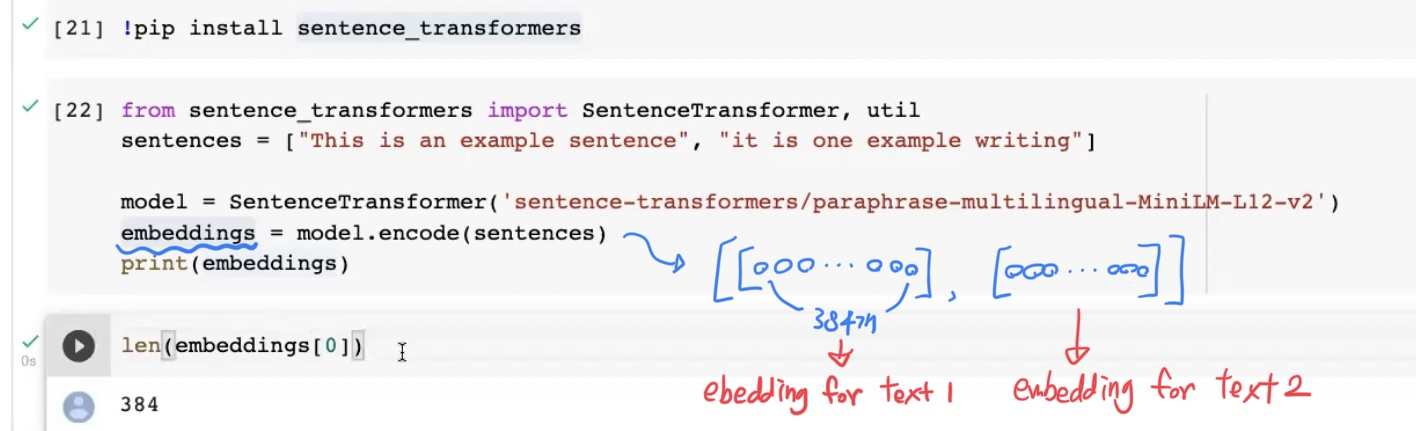

각 embedding이 feature이고, vector(숫자열) -> 이 embedding으로 우리가 **similarity**를 계산할 수 있음! (중요)

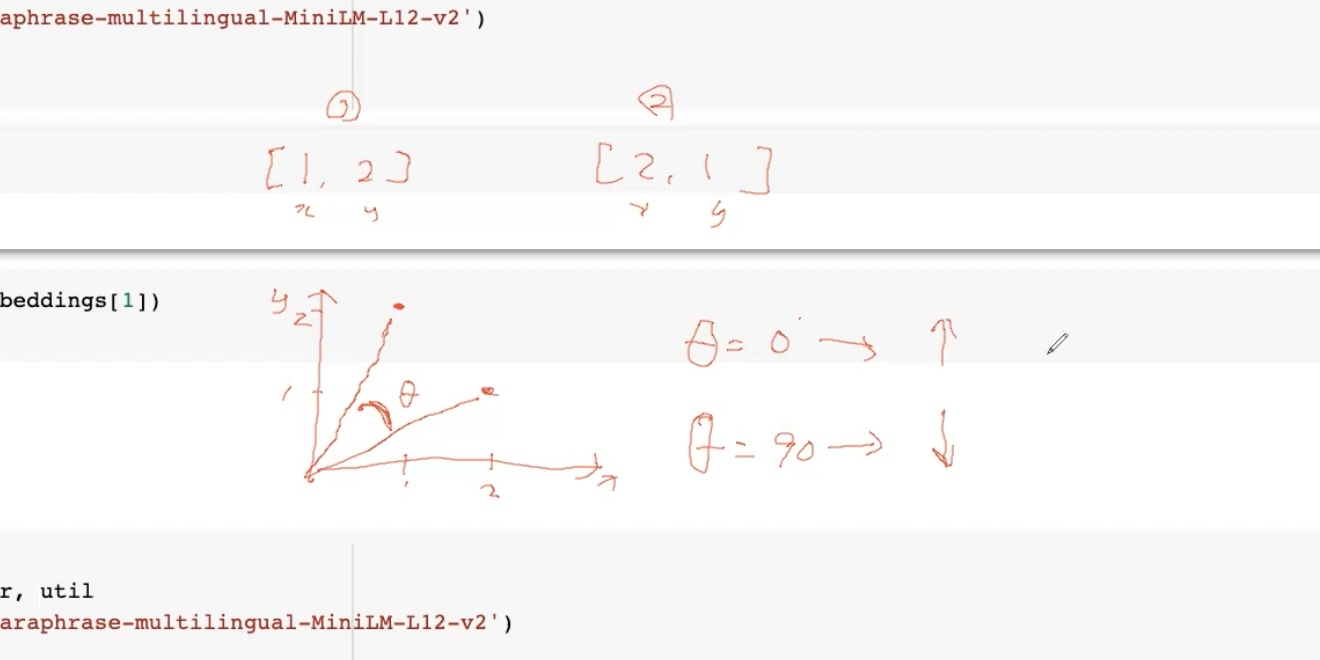

- 위 그림처럼 embedding(벡터값)을 그래프에 찍어서 두 개 텍스트 간의 similarity를 비교

  -> 두 점을 찍고, 그 점을 원점과 연결한 후 그때 생기는 직선 사이의 각도를 통해 유사도 비교

  -> 각도(theta)가 0에 가까울수록 유사도가 높아지고 90도에 가까울수록 유사도 낮은 것

  -> 이 각도를 cos(코사인)에 넣어서 비교함!  = cos(θ) 

  -> cos(0) = 1  /// cos(90) = 0       (0, 90은 둘 다 radian값. 즉, 90은 파이/2)

  ->즉, 유사도가 높을 때는1. 유사도가 없을 때는 0이 나오는 것


- 따라서 similarity between 2 vectors(=embeddings)는 그 벡터들의 각도값의 cos(θ)로 구하면 되고, 따라서 이를 **cosine similarity**라고 함

In [ ]:
cosine_scores = util.pytorch_cos_sim(embeddings[0], embeddings[1])
cosine_scores

# cosine similarity를 계산해주는 함수


Demo in Gradio

In [ ]:
def func (text1, text2):
  from sentence_transformers import SentenceTransformer, util
  model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
  embeddings = model.encode([text1, text2])
  cosine_scores = util.pytorch_cos_sim(embeddings[0], embeddings[1])
  return cosine_scores


  # 위의 과정들을 function으로 만든 것

In [ ]:
examples = [["This is an example sentence", "it is one example writing"], ["A frog is hopping near the pond", "I love Korean Food"]]

In [ ]:
gr.Interface(fn=func, inputs=['text', 'text'], outputs='number', examples = examples).launch()